In [43]:
import import_ipynb
from ETL_EDA import df

In [44]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'labels', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status_closed'],
      dtype='object')

In [45]:
df[['relationships','funding_rounds']]

,relationships,funding_rounds
0,3,3
1,9,4
2,5,1
3,5,3
4,2,2
...,...,...
918,9,1
919,1,3
920,5,1
921,12,2


In [46]:
df

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,c:6669,0,1,0,0,0,0,1.0000,0,0
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,c:16283,1,0,0,1,1,1,4.7500,1,0
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,c:65620,0,0,1,0,0,0,4.0000,1,0
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,...,c:42668,0,0,0,1,1,1,3.3333,1,0
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,...,c:65806,1,1,0,0,0,0,1.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,2009-01-01,2009-07-09,2009-07-09,...,c:21343,0,0,1,0,0,0,6.0000,1,0
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,1998-01-01,2005-04-01,2007-03-23,...,c:41747,1,0,0,1,0,0,2.6667,1,1
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,1999-01-01,2007-06-29,2007-06-29,...,c:31549,0,0,0,0,0,1,8.0000,1,1
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,2009-01-01,2009-10-05,2011-11-01,...,c:33198,0,0,1,1,0,0,1.0000,1,0


In [47]:
nbins = 5

heatmap, xedges, yedges = np.histogram2d(df['relationships'], df['funding_rounds'], bins=nbins, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [48]:
print(max(df['relationships']))
print(max(df['funding_rounds']))

63
10


/Applications/anaconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10



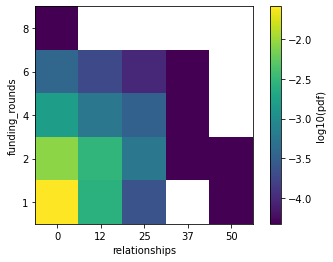

In [49]:
plt.imshow(np.log10(heatmap).T, origin='lower')
plt.xlabel('relationships')
plt.ylabel('funding_rounds')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='log10(pdf)')
plt.show()

In [59]:
top_5 = (df['state_code'].value_counts())[:5]
top_5_states = list(top_5.keys())

relationships = df['relationships']
funding_rounds = df['funding_rounds']

In [62]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)


fig = go.Figure(data=go.Heatmap(
        z=heatmap,
        x=relationships,
        y=funding_rounds,
        colorscale='Viridis'))

# fig.update_layout(
#     title='GitHub commits per day',
#     xaxis_nticks=36)

fig.update_layout()

fig.show()

In [53]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# df = px.data.medals_wide(indexed=True)

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.P("Medals included:"),
#     dcc.Checklist(
#         id='medals',
#         options=[{'label': x, 'value': x} 
#                  for x in df.columns],
#         value=df.columns.tolist(),
#     ),
#     dcc.Graph(id="graph"),
# ])

# @app.callback(
#     Output("graph", "figure"), 
#     [Input("medals", "value")])
# def filter_heatmap(cols):
#     fig = px.imshow(df[cols])
#     return fig

# app.run_server(debug=True)

In [54]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# df = px.data.medals_wide(indexed=True)

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.P("Medals included:"),
#     dcc.Checklist(
#         id='medals',
#         options=[{'label': x, 'value': x} 
#                  for x in df.columns],
#         value=df.columns.tolist(),
#     ),
#     dcc.Graph(id="graph"),
# ])

# @app.callback(
#     Output("graph", "figure"), 
#     [Input("medals", "value")])
# def filter_heatmap(cols):
#     fig = px.imshow(df[cols])
#     return fig

# app.run_server(debug=True)